## Elementary Cellular Automata
Example for elementary cellular automata.
In mathematics and computability theory, an elementary cellular automaton is a one-dimensional cellular automaton where there are two possible states (labeled 0 and 1) and the rule to determine the state of a cell in the next generation depends only on the current state of the cell and its two immediate neighbors.
For this example, we use ndautomata as main library to generate the rule 110, capable of universal computation, and as such it is one of the simplest possible models of computation.

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
import numpy as np
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 1D `Automaton` class defining a regular array of 1 dimension index. Radius is set to 1 to limit neighbours to the direct contact. Number of possible states is set to 2 in order to follow the elementary specifications.

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.regular(ndim=1, r=1)
    states = 2

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 3 arguments, one for the cell state and two each direct neighbour:

$$a{_{i}^{t+1}} = \phi \begin{bmatrix} a{_{i-1}^{t}}, a{_{i}^{t}}, a{_{i+1}^{t}} \end{bmatrix}$$

As the space of possible rules is already studied and defined between 0-255 ($2{^8}$), it is possible to use `numpy.uint8` to generate the desired rule array (110 for this example).

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = np.unpackbits(np.uint8(110), bitorder="little")
rule = rule.reshape(connections)

nce the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a unique active state *1* located at the first corner/border of the initial conditions. All the rest of cells start with the value *0*.

In [4]:
ic = initializers.border(states=Automaton.states, size=[200])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate the rule space-time diagram. As on the elementary diagram, in this plot, each row of pixels shows the cells of the automaton at a single point in time, with time increasing downwards.

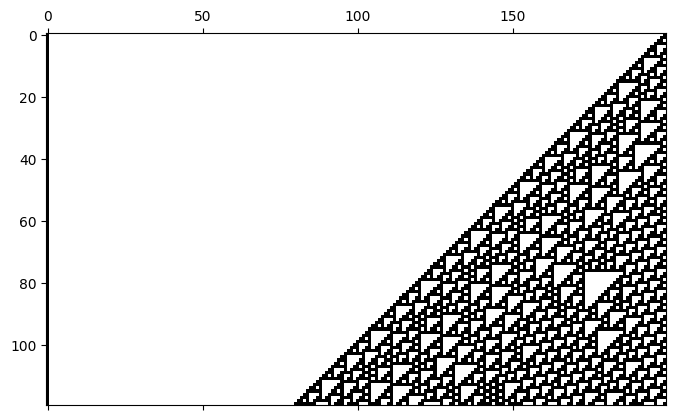

In [5]:
plt.rcParams["image.cmap"] = "binary"
plt.matshow([next(automaton) for _ in range(120)])
plt.show()

Total runtime is around `0.2s` on a `Intel(R) Core(TM) i5-8365U CPU @ 1.60GHz`.